## Basic ConvNets Creation

Import the Library

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# Setting the program
plt.rc('figure',autolayout=True)
plt.rc('image',cmap= 'magma')

Defining the kernel

In [18]:
kernel = tf.constant([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

Loading the Image

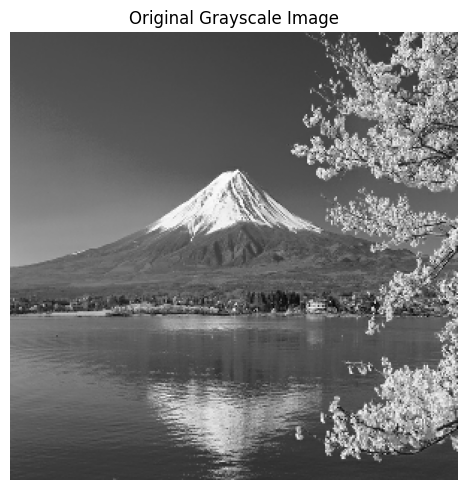

In [19]:
image = tf.io.read_file('japan.jpg')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])

# Plotting the Image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()

Reformatting the Image

In [20]:
# Change Image to float
image = tf.image.convert_image_dtype(image,dtype=tf.float32)
image = tf.expand_dims(image,axis =0)

# Reshaping Kernel
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

Now both Image and kernal is setting to float tensor.

### Create ConvNets
Create the Convolution Layer which have 2D

In [21]:
conv_fn = tf.nn.conv2d

image_filter = conv_fn(input = image,
                       filters = kernel,
                       strides=1, # or (1,1)
                       padding='SAME'
                    )

Plot the Convolved (ทำให้ม้วนเข้าด้วยกัน) Image

Text(0.5, 1.0, 'Convolution')

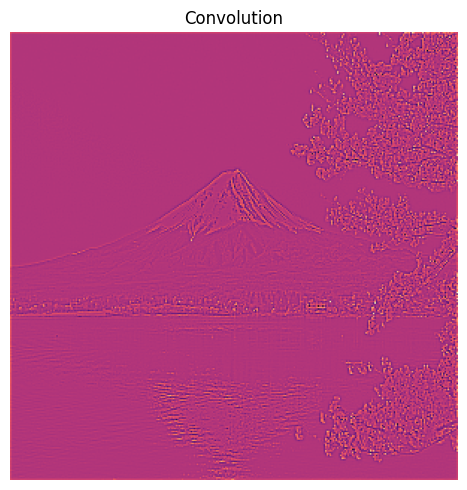

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

# tf.squeeze is to remove the dimension of size 1 from shape of a tensor
plt.imshow(tf.squeeze(image_filter))
plt.axis("off")
plt.title('Convolution')

Plot the Activation

Text(0.5, 1.0, 'Activation')

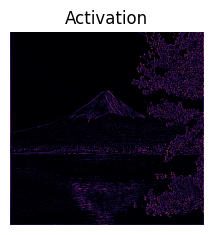

In [23]:
relu_fn = tf.nn.relu

# Image Detection
image_detect = relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))

plt.axis('off')
plt.title('Activation')

Pooling Layer

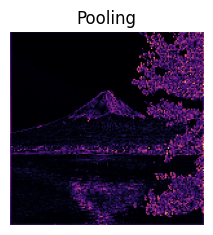

In [24]:
# define the pooling layer function
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape=(2,2),
                      pooling_type="MAX",
                      strides=(2,2),
                      padding="SAME")

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()